In [1]:
from google.colab import files

In [2]:
files.upload()

Saving Maternal Health Risk Data Set.csv to Maternal Health Risk Data Set (1).csv


{'Maternal Health Risk Data Set.csv': b'\xef\xbb\xbfAge,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel\r\n25,130,80,15,98,86,high risk\r\n35,140,90,13,98,70,high risk\r\n29,90,70,8,100,80,high risk\r\n30,140,85,7,98,70,high risk\r\n35,120,60,6.1,98,76,low risk\r\n23,140,80,7.01,98,70,high risk\r\n23,130,70,7.01,98,78,mid risk\r\n35,85,60,11,102,86,high risk\r\n32,120,90,6.9,98,70,mid risk\r\n42,130,80,18,98,70,high risk\r\n23,90,60,7.01,98,76,low risk\r\n19,120,80,7,98,70,mid risk\r\n25,110,89,7.01,98,77,low risk\r\n20,120,75,7.01,100,70,mid risk\r\n48,120,80,11,98,88,mid risk\r\n15,120,80,7.01,98,70,low risk\r\n50,140,90,15,98,90,high risk\r\n25,140,100,7.01,98,80,high risk\r\n30,120,80,6.9,101,76,mid risk\r\n10,70,50,6.9,98,70,low risk\r\n40,140,100,18,98,90,high risk\r\n50,140,80,6.7,98,70,mid risk\r\n21,90,65,7.5,98,76,low risk\r\n18,90,60,7.5,98,70,low risk\r\n21,120,80,7.5,98,76,low risk\r\n16,100,70,7.2,98,80,low risk\r\n19,120,75,7.2,98,66,low risk\r\n22,100,65,7.2,98,7

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [4]:
df=pd.read_csv('Maternal Health Risk Data Set.csv')

In [5]:
df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk
...,...,...,...,...,...,...,...
1009,22,120,60,15.0,98.0,80,high risk
1010,55,120,90,18.0,98.0,60,high risk
1011,35,85,60,19.0,98.0,86,high risk
1012,43,120,90,18.0,98.0,70,high risk


In [6]:
df['RiskLevel']=df['RiskLevel'].replace(['high risk'],2)

In [7]:
df['RiskLevel']=df['RiskLevel'].replace(['low risk'],0)
df['RiskLevel']=df['RiskLevel'].replace(['mid risk'],1)

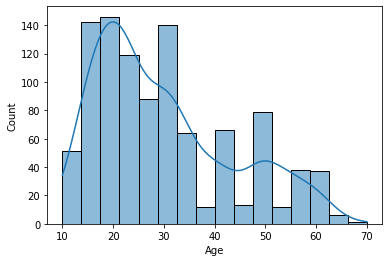

In [8]:
sns.histplot(df['Age'],kde=True)

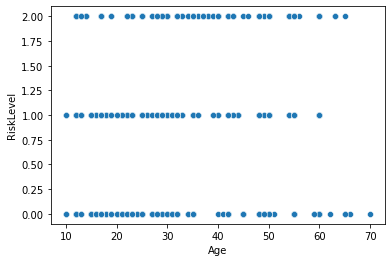

In [9]:
sns.scatterplot(x='Age',y='RiskLevel',data=df)

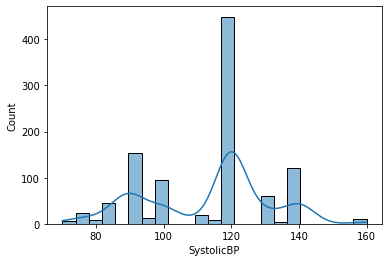

In [10]:
sns.histplot(df['SystolicBP'],kde=True)

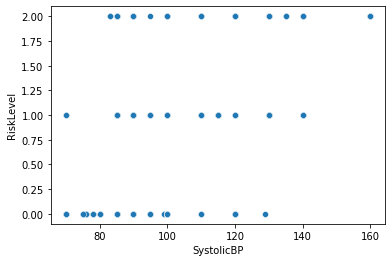

In [11]:
sns.scatterplot(x='SystolicBP',y='RiskLevel',data=df)

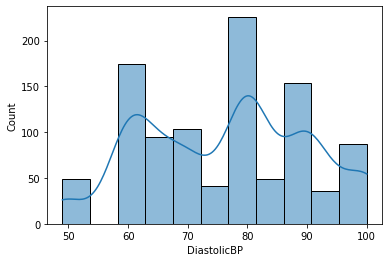

In [12]:
sns.histplot(df['DiastolicBP'],kde=True)

In [13]:
df[(df['DiastolicBP']==60)]

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
4,35,120,60,6.10,98.0,76,0
7,35,85,60,11.00,102.0,86,2
10,23,90,60,7.01,98.0,76,0
23,18,90,60,7.50,98.0,70,0
29,28,90,60,7.20,98.0,82,0
...,...,...,...,...,...,...,...
996,12,90,60,8.00,102.0,66,2
1000,12,90,60,11.00,102.0,60,2
1006,17,85,60,6.30,102.0,86,2
1009,22,120,60,15.00,98.0,80,2


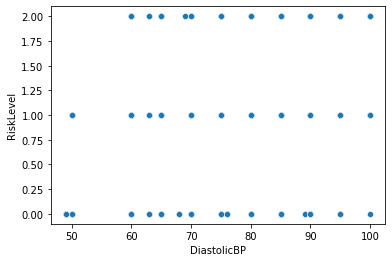

In [14]:
sns.scatterplot(x='DiastolicBP',y='RiskLevel',data=df)

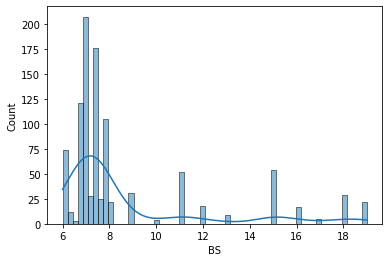

In [15]:
sns.histplot(df['BS'],kde=True)

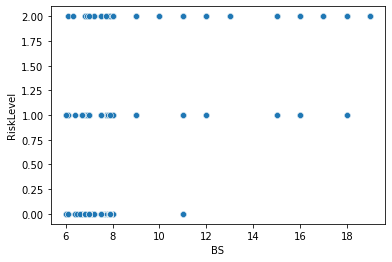

In [16]:
sns.scatterplot(x='BS',y='RiskLevel',data=df)

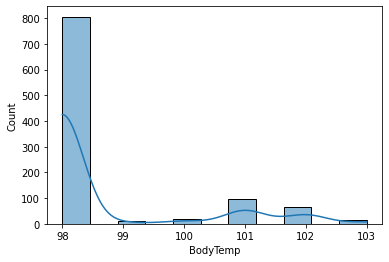

In [17]:
sns.histplot(df['BodyTemp'],kde=True)

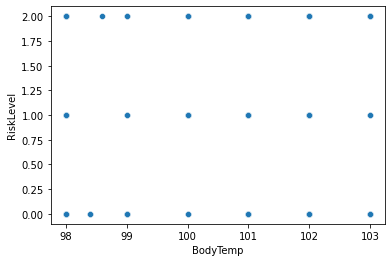

In [18]:
sns.scatterplot(x='BodyTemp',y='RiskLevel',data=df)

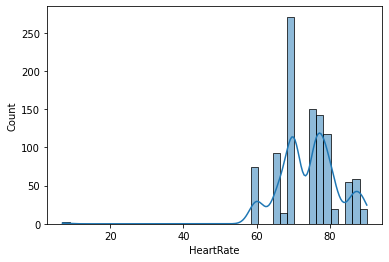

In [19]:
sns.histplot(df['HeartRate'],kde=True)

In [20]:
x=df.drop(['RiskLevel'],axis=1)
y=df['RiskLevel']

In [21]:
Feature=SelectKBest(k='all')

In [22]:
Feature.fit(x,y)

SelectKBest(k='all')

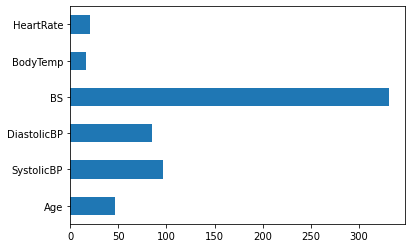

In [23]:
pd.Series(Feature.scores_,index=x.columns).plot(kind='barh')

In [24]:
top_columns=x.drop(['BodyTemp'],axis=1)

In [25]:
top_columns

,Age,SystolicBP,DiastolicBP,BS,HeartRate
0,25,130,80,15.0,86
1,35,140,90,13.0,70
2,29,90,70,8.0,80
3,30,140,85,7.0,70
4,35,120,60,6.1,76
...,...,...,...,...,...
1009,22,120,60,15.0,80
1010,55,120,90,18.0,60
1011,35,85,60,19.0,86
1012,43,120,90,18.0,70


In [26]:
x=top_columns

In [27]:
Extra=ExtraTreesClassifier(n_estimators=10)

In [28]:
Extra.fit(x,y)

ExtraTreesClassifier(n_estimators=10)

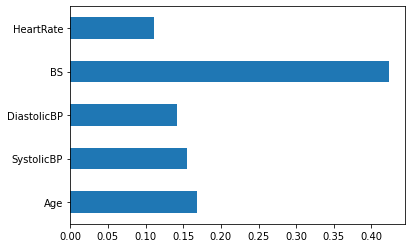

In [29]:
pd.Series(Extra.feature_importances_,index=x.columns).plot(kind='barh')

In [30]:
Forest=RandomForestClassifier(n_estimators=20)
KNN=KNeighborsClassifier(n_neighbors=115)
GNB=GaussianNB()
BNB=BernoulliNB()
Support=SVC(gamma='auto')
Tree=DecisionTreeClassifier()
LR=LogisticRegression()

In [31]:
Algorithm_name=[Forest,KNN,GNB,BNB,Support,Tree,LR]

In [32]:
Scores=[]
averages=[]
for i in Algorithm_name:
  cv_score=cross_val_score(i,x,y,cv=10)
  Scores.append(cv_score)
  averages.append(cv_score.mean())

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [33]:
Scores=pd.DataFrame(Scores)

In [34]:
averages=pd.DataFrame(averages,columns=['Averages'])

In [35]:
Algorithms=pd.DataFrame(["Forest","KNN","GNB","BNB","Support","Tree","LR"],columns=['Algorithms'])

In [36]:
pd.concat([pd.concat([Algorithms,Scores],axis=1),averages],axis=1)

,Algorithms,0,1,2,3,4,5,6,7,8,9,Averages
0,Forest,0.970588,0.970588,0.843137,0.676471,0.712871,0.930693,0.831683,0.792079,0.782178,0.851485,0.836177
1,KNN,0.598039,0.607843,0.549020,0.529412,0.514851,0.653465,0.564356,0.534653,0.584158,0.504950,0.564075
2,GNB,0.549020,0.627451,0.558824,0.588235,0.623762,0.643564,0.613861,0.564356,0.584158,0.643564,0.599680
3,BNB,0.392157,0.392157,0.401961,0.401961,0.405941,0.405941,0.405941,0.405941,0.396040,0.396040,0.400408
4,Support,0.862745,0.862745,0.764706,0.735294,0.633663,0.801980,0.792079,0.693069,0.693069,0.801980,0.764133
5,Tree,0.970588,0.950980,0.843137,0.607843,0.574257,0.930693,0.831683,0.752475,0.792079,0.851485,0.810522
6,LR,0.627451,0.637255,0.558824,0.598039,0.524752,0.504950,0.544554,0.425743,0.524752,0.623762,0.557008


In [37]:
Table=pd.concat([pd.concat([Algorithms,Scores],axis=1),averages],axis=1)

In [38]:
average=list(Table['Averages'])

In [39]:
algo_best=Algorithm_name[average.index(max(average))]

In [40]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=1)

In [41]:
algo_best.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=20)

In [42]:
algo_best.score(x,y)

0.9142011834319527

In [43]:
from sklearn.ensemble import StackingClassifier

In [44]:
Algorithm_name=[("Tree",Tree),("KNN",KNN),("LR",LR),("Forest",Forest),("SVM",Support),("GNB",GNB),("BNB",BNB)]
Stacking=StackingClassifier(estimators=Algorithm_name,final_estimator=LR)

In [45]:
Stacking.fit(xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


StackingClassifier(estimators=[('Tree', DecisionTreeClassifier()),
                               ('KNN', KNeighborsClassifier(n_neighbors=115)),
                               ('LR', LogisticRegression()),
                               ('Forest',
                                RandomForestClassifier(n_estimators=20)),
                               ('SVM', SVC(gamma='auto')),
                               ('GNB', GaussianNB()), ('BNB', BernoulliNB())],
                   final_estimator=LogisticRegression())

In [46]:
Stacking.score(x,y)

0.9161735700197239

In [47]:
pred=Stacking.predict(xtest)

In [48]:
xtest.shape

(153, 5)

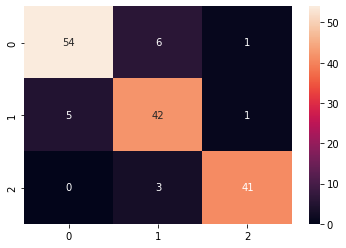

In [49]:
from sklearn.metrics import confusion_matrix,classification_report
sns.heatmap(confusion_matrix(ytest,pred),annot=True,fmt='d')

In [50]:
pd.Series(ytest).value_counts()

0    61
1    48
2    44
Name: RiskLevel, dtype: int64

In [51]:
print(classification_report(ytest,pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90        61
           1       0.82      0.88      0.85        48
           2       0.95      0.93      0.94        44

    accuracy                           0.90       153
   macro avg       0.90      0.90      0.90       153
weighted avg       0.90      0.90      0.90       153



In [52]:
Column_names=["Age","SystolicBP","DiastolicBP","BS","HeartRate"]

In [53]:
xtest

,Age,SystolicBP,DiastolicBP,BS,HeartRate
919,19,90,70,7.5,80
619,29,130,70,7.5,78
293,23,120,80,7.7,70
507,18,120,80,7.9,76
974,33,120,75,10.0,70
...,...,...,...,...,...
573,42,120,80,7.5,70
482,50,140,95,17.0,60
823,29,130,70,7.5,78
473,32,140,100,7.9,78


In [54]:
for_pred=[]

In [55]:
for i in Column_names:
  item=input(f"{i}:")
  for_pred.append(item)

Age:18
SystolicBP:120
DiastolicBP:80
BS:7.5
HeartRate:65


In [58]:
k=Stacking.predict([for_pred])
if(k==2):
  print("High Risk")
elif(k==1):
  print('Mid Risk')
else:
  print("Low Risk")

Low Risk


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:561: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  X = check_array(X, **check_params)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-

In [59]:
import pickle as pk

In [60]:
pk.dump(Stacking,open('My_Model','wb'))